In [83]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [101]:
df = pd.read_csv('/Users/dazzz/Desktop/AAPL2.csv')


In [102]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568935,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561855,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750263,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061142,82271200


In [103]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [104]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568935,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561855,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750263,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061142,82271200


In [105]:
import gym
import gym_anytrading

# Check if 'stocks-v0' is available
env_list = list(gym.envs.registry.keys())
print('stocks-v0' in env_list)


False


In [107]:
from gym_anytrading.envs import StocksEnv
import pandas as pd

df = pd.read_csv('/Users/dazzz/Desktop/gmedata.csv')
env = StocksEnv(df=df, window_size=5, frame_bound=(5, 100))


In [108]:
env.signal_features

array([[22.41,  0.  ],
       [22.18, -0.23],
       [23.28,  1.1 ],
       [22.68, -0.6 ],
       [22.73,  0.05],
       [20.57, -2.16],
       [20.63,  0.06],
       [20.54, -0.09],
       [20.93,  0.39],
       [20.7 , -0.23],
       [21.22,  0.52],
       [21.41,  0.19],
       [21.66,  0.25],
       [21.27, -0.39],
       [21.33,  0.06],
       [20.83, -0.5 ],
       [20.91,  0.08],
       [20.5 , -0.41],
       [20.71,  0.21],
       [20.9 ,  0.19],
       [21.4 ,  0.5 ],
       [21.2 , -0.2 ],
       [21.49,  0.29]], dtype=float32)

In [109]:
env.action_space


Discrete(2)

In [127]:
# Run the environment with adjusted unpacking
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)  # Unpack the fifth value

    if done or truncated:  # End the loop if either done or truncated
        print("info:", info)
        break


info: {'total_reward': 0.07000160217285156, 'total_profit': 0.9768878579928817, 'position': <Positions.Long: 1>}


In [131]:
# Set up the environment directly, no video recording
env_maker = lambda: StocksEnv(df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

# Create and train the model
# model = A2C(
#     'MlpPolicy', 
#     env, 
#     verbose=1, 
#     ent_coef=0.05,          
#     learning_rate=0.001,    
#     gamma=0.95,            
#     n_steps=3               
# )

model = A2C(
    'MlpPolicy', 
    env, 
    verbose=1, 
    ent_coef=0.02,          
    learning_rate=0.0005,   
    gamma=0.99,             
    n_steps=5               
)

model.learn(total_timesteps=1000000)



Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1157     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.66    |
|    explained_variance | 0.103    |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -0.0241  |
|    value_loss         | 0.0029   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1198     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.617   |
|    explained_variance | 0.0882   |
|    learning_rate      | 0.0005   |
|    n_updates          | 199      |
|    policy_loss        | 0.407    |
|    value_loss      

In [132]:
from gym_anytrading.envs import StocksEnv
import numpy as np

# Initialize StocksEnv with appropriate frame bounds based on your data
env = StocksEnv(df=df, frame_bound=(5, 20), window_size=5)
obs, _ = env.reset()  # Unpack observation and ignore extra info if present

while True:
    obs = obs[np.newaxis, ...]  # Reshape observation for model compatibility
    action, _states = model.predict(obs)
    
    # Handle cases where `step` returns either four or five values
    result = env.step(action)
    if len(result) == 4:
        obs, reward, done, info = result
        truncated = False
    else:
        obs, reward, done, truncated, info = result

    # Break the loop if done or truncated
    if done or truncated:
        print("info:", info)
        break


info: {'total_reward': 1.5099964141845703, 'total_profit': 0.9818599640641208, 'position': <Positions.Long: 1>}


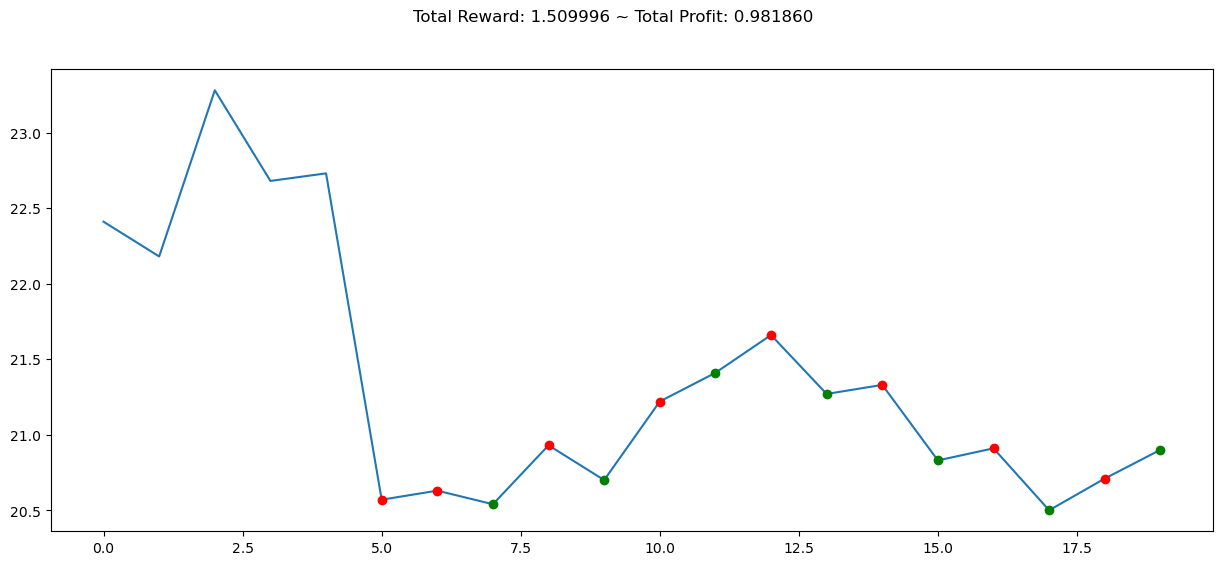

In [133]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()